In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from policy_evaluator_epsilon_greedy import epsilon_greedy_algorithm_random, epsilon_greedy_algorithm_min, policy_evaluator_epsilon_random, policy_evaluator_epsilon_min
import random

First, we import the data

In [17]:
data = pd.read_csv('../Data/dataset_1000_minimum_reviews.csv', index_col='Unnamed: 0')
df = data[['time', 'movie_id', 'user_id', 'binary_rating']]
df_50_popular = pd.read_csv('../Data/dataset_50_most_populars.csv', index_col='Unnamed: 0')
df_100_popular = pd.read_csv('../Data/dataset_100_most_popular.csv', index_col='Unnamed: 0')
df.head()

,time,movie_id,user_id,binary_rating
0,0,1197,3669,0
1,1,780,3621,0
2,2,1234,4917,0
3,3,1544,1147,0
4,4,3175,262,1


In [7]:
payoffs1 = policy_evaluator_epsilon_random(df, epsilon_value = 0.15)

In [8]:
payoffs2 = policy_evaluator_epsilon_min(df, epsilon_value = 0.15)

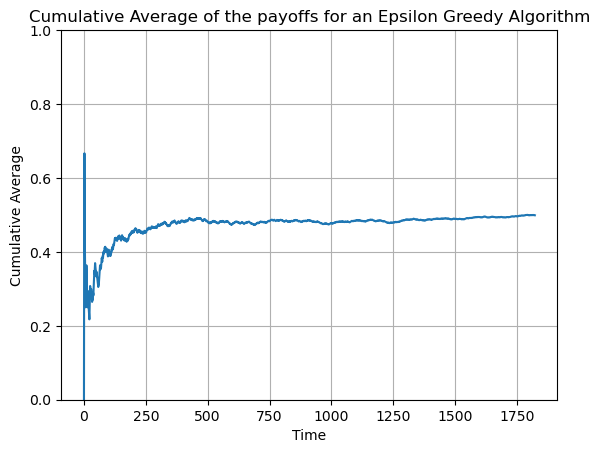

In [13]:
cumulative_average = np.cumsum(payoffs1) / np.arange(1, len(payoffs1)+1)

plt.plot(cumulative_average)
plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for an Epsilon Greedy Algorithm")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

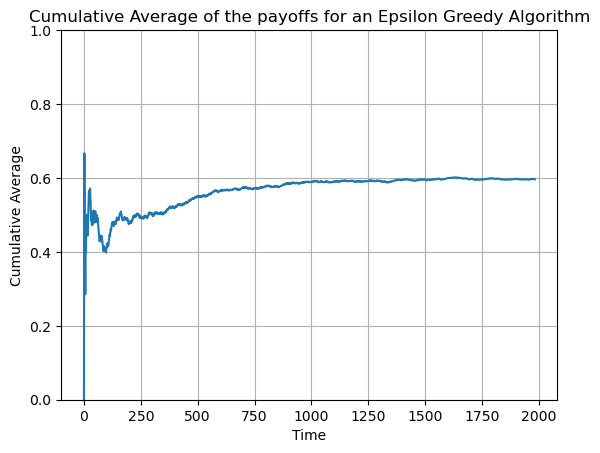

In [16]:
cumulative_average = np.cumsum(payoffs2) / np.arange(1, len(payoffs2)+1)

plt.plot(cumulative_average)
plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for an Epsilon Greedy Algorithm")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

No big differences between both algorithm, we thus decide to keep the argmin.

In [29]:
epsilon_values = [0.001, 0.01, 0.1, 0.15, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999]

In [32]:
for epsilon_value in epsilon_values:
    payoffs = policy_evaluator_epsilon_min(df, epsilon_value = epsilon_value)
    pd.DataFrame(payoffs).to_csv(f'../Plots/Data/epsilongreedy/epsilon_greedy_{epsilon_value}.csv')